# Demo of the AttractorField class

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gradplanner.attractor_field import AttractorField
from gradplanner.utils import plot_grad_field

In [2]:
%load_ext autoreload
%autoreload 2

## 1: Creating an Attractor field and then inserting extra obstacles into it

In [27]:
# Defining an occupancy grid:
scale = 2
M = 32 * scale
N = 32 * scale
R = 5  * scale
goal_position = np.array([25 * scale, 6 * scale]) 

# creating the boarder:
occupancy_grid = np.ones((M, N))
occupancy_grid[1: -1, 1: -1] = np.zeros((M - 2, N - 2))

# obstacles:
occupancy_grid[4 * scale: 9 * scale, 10 * scale: 16 * scale] = 1

# just another occ grid with the goal for plotting:
occ_grid_to_plot = occupancy_grid.copy()
occ_grid_to_plot[goal_position[0], goal_position[1]] = -1

<Figure size 1152x1152 with 0 Axes>

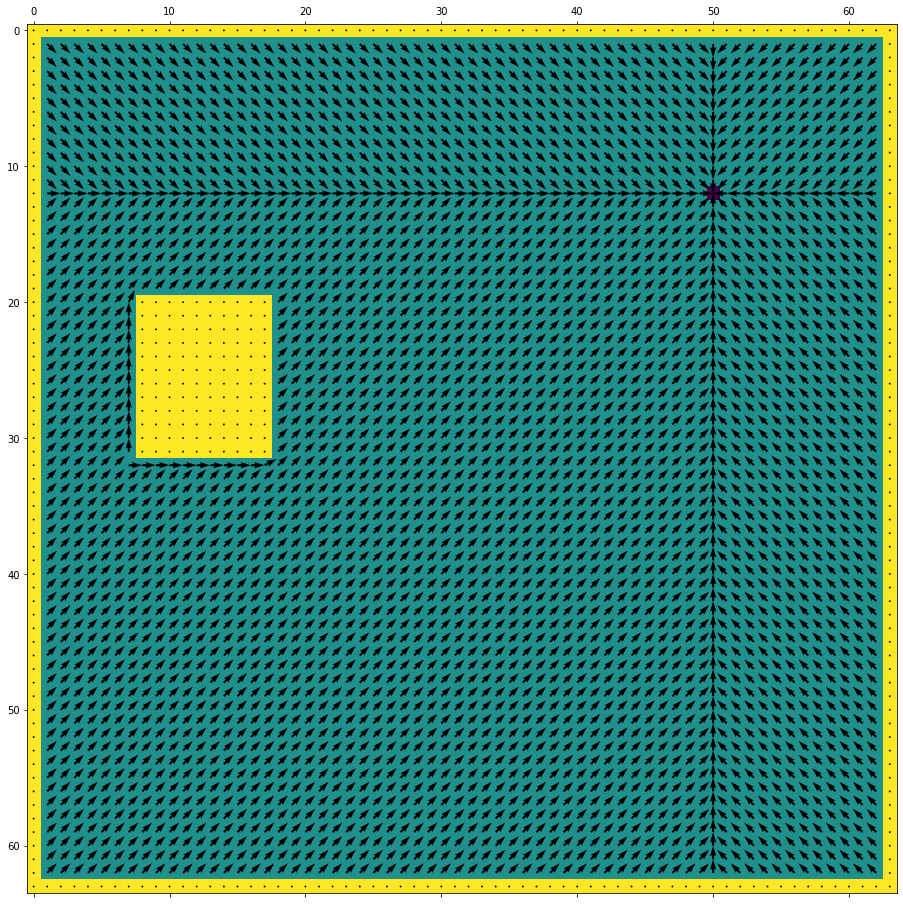

In [28]:
# creating the AttractorField object:
attractor = AttractorField(occupancy_grid, goal_position)
attractor.plot_field()

In [29]:
# some new obstacles:
occupancy_grid[15 * scale: 20 * scale, 9 * scale: 13 * scale] = 1
# u-shaped obstacle:
occupancy_grid[16 * scale: 26 * scale, 20 * scale: 22 * scale] = 1
occupancy_grid[16 * scale: 18 * scale, 21 * scale: 26 * scale] = 1
occupancy_grid[24 * scale: 26 * scale, 21 * scale: 26 * scale] = 1
occupancy_grid[18 * scale: 20 * scale, 25 * scale: 26 * scale] = 1
occupancy_grid[22 * scale: 24 * scale, 25 * scale: 26 * scale] = 1

In [30]:
# updating the AttractorField object with the new occupancy_grid:
attractor.update_occupancy_grid(occupancy_grid)
attractor.plot_field()

AttributeError: 'int' object has no attribute 'value'